<ipython-input-2-62af4698b269>:16: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Date'] = pd.to_datetime(data['Date'])
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:22:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Logistic Regression Results:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
ROC-AUC: 1.0000


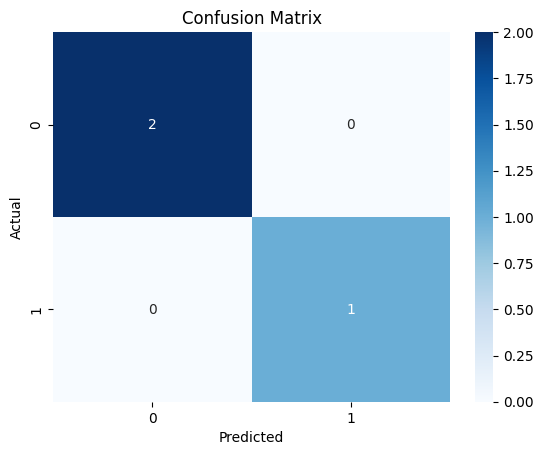

Random Forest Results:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
ROC-AUC: 1.0000


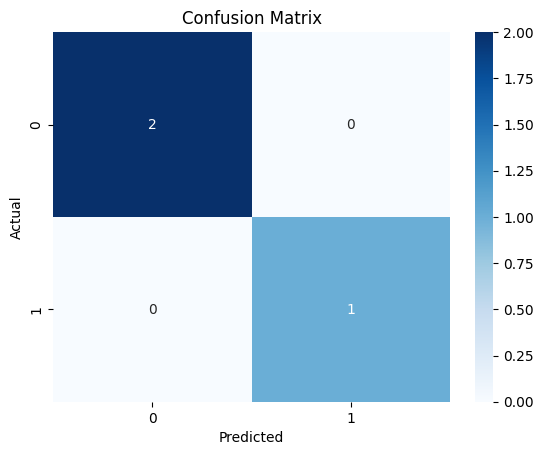

XGBoost Results:
Accuracy: 0.6667
Precision: 0.0000
Recall: 0.0000
ROC-AUC: 0.5000


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


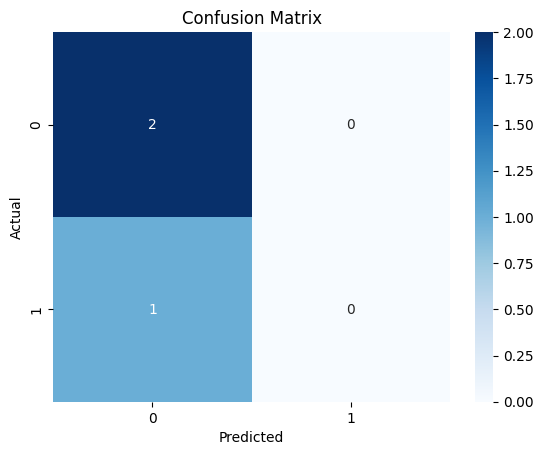

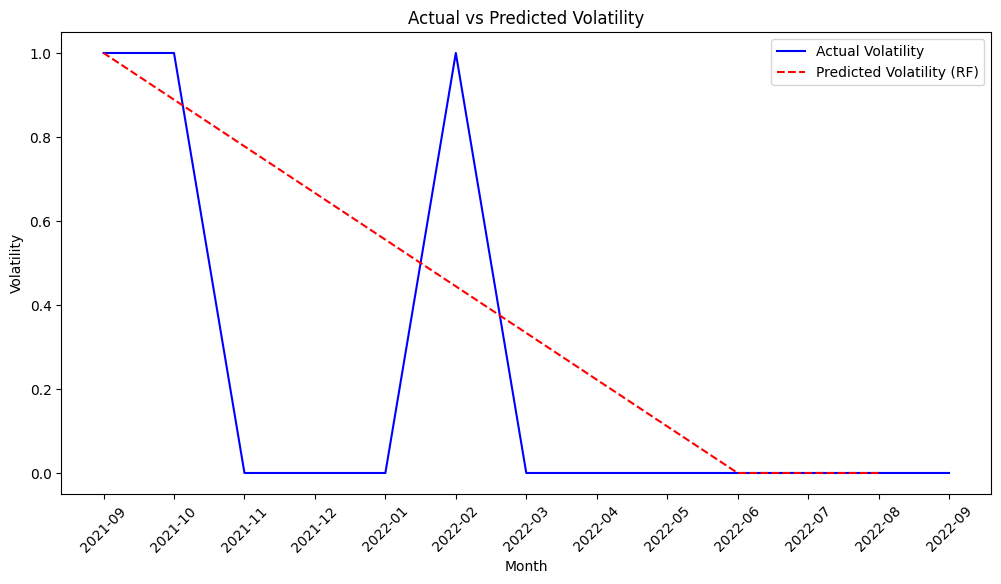

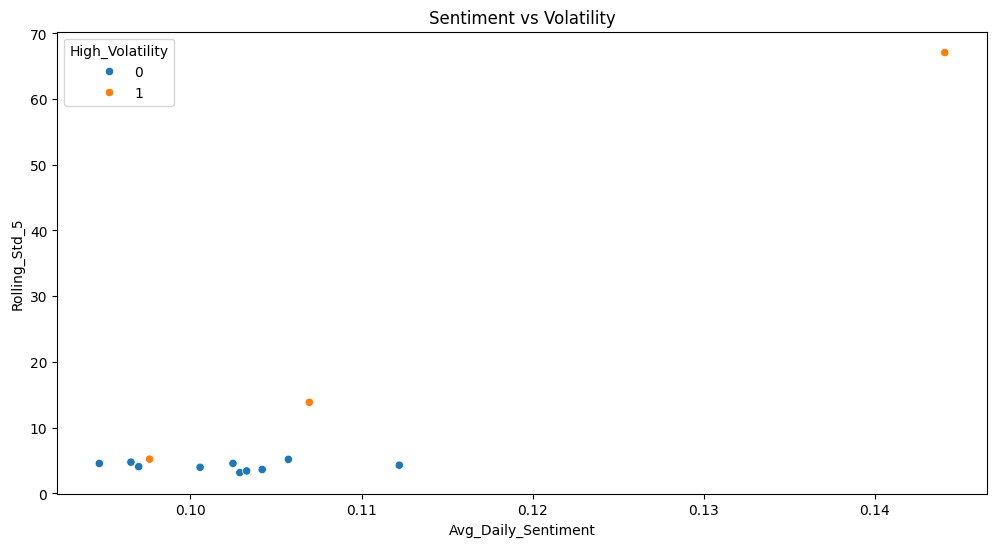

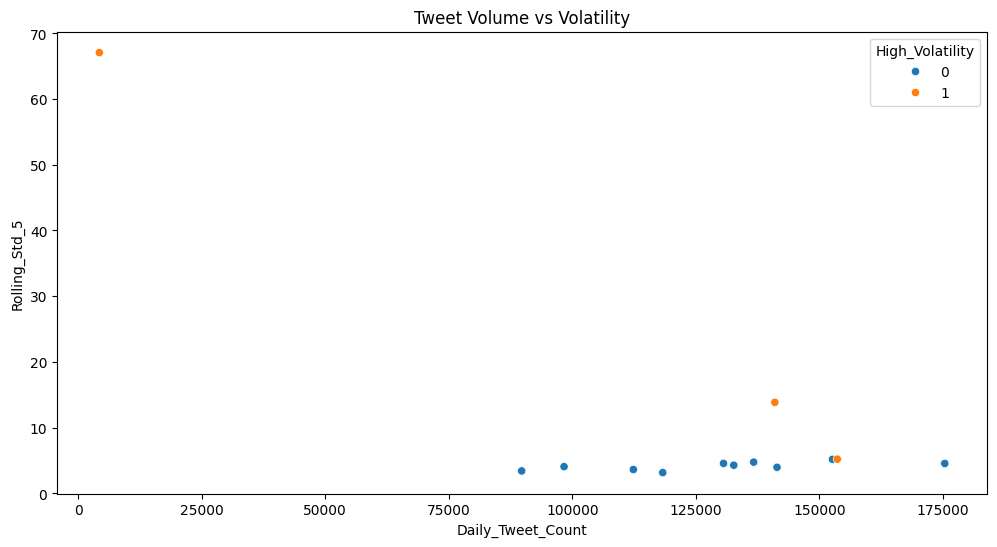

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/merged_stock_tweet_data (1).csv')

# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Extract month and year from 'Date'
data['YearMonth'] = data['Date'].dt.to_period('M')

# Aggregate data by month
monthly_data = data.groupby('YearMonth').agg({
    'Daily_Return': 'mean',
    'Rolling_Std_5': 'mean',
    'MA_5': 'mean',
    'MA_20': 'mean',
    'Avg_Daily_Sentiment': 'mean',
    'Sentiment_Volatility': 'mean',
    'Daily_Tweet_Count': 'sum'
}).reset_index()

# Define High Volatility
vol_threshold = monthly_data['Rolling_Std_5'].quantile(0.75)
monthly_data['High_Volatility'] = (monthly_data['Rolling_Std_5'] > vol_threshold).astype(int)

# Feature Selection
features = ['Daily_Return', 'Rolling_Std_5', 'MA_5', 'MA_20',
            'Avg_Daily_Sentiment', 'Sentiment_Volatility', 'Daily_Tweet_Count']
target = 'High_Volatility'

X = monthly_data[features]
y = monthly_data[target]

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Building
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

# Random Forest
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

# XGBoost
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_clf.fit(X_train, y_train)

# Model Evaluation
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'ROC-AUC: {roc_auc:.4f}')

    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

print("Logistic Regression Results:")
evaluate_model(log_reg, X_test_scaled, y_test)

print("Random Forest Results:")
evaluate_model(rf_clf, X_test, y_test)

print("XGBoost Results:")
evaluate_model(xgb_clf, X_test, y_test)

# Visualization
# Plotting predicted vs actual volatility periods
plt.figure(figsize=(12, 6))
plt.plot(monthly_data['YearMonth'].astype(str), monthly_data['High_Volatility'], label='Actual Volatility', color='blue')
plt.plot(monthly_data['YearMonth'].iloc[y_test.index].astype(str), rf_clf.predict(X_test), label='Predicted Volatility (RF)', linestyle='--', color='red')
plt.xlabel('Month')
plt.ylabel('Volatility')
plt.title('Actual vs Predicted Volatility')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Relationship between tweet sentiment/volume and volatility
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Avg_Daily_Sentiment', y='Rolling_Std_5', hue='High_Volatility', data=monthly_data)
plt.title('Sentiment vs Volatility')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Daily_Tweet_Count', y='Rolling_Std_5', hue='High_Volatility', data=monthly_data)
plt.title('Tweet Volume vs Volatility')
plt.show()


<ipython-input-3-f04a31e41479>:16: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Date'] = pd.to_datetime(data['Date'])
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:23:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Logistic Regression Results:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
ROC-AUC: 1.0000


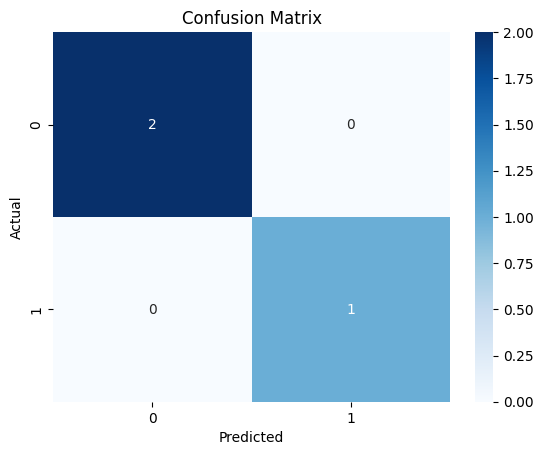

Random Forest Results:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
ROC-AUC: 1.0000


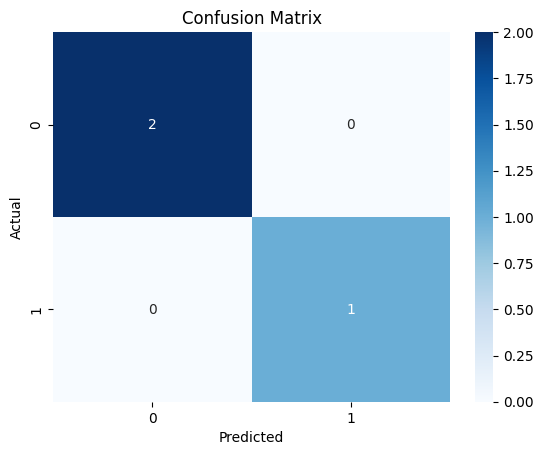

XGBoost Results:
Accuracy: 0.6667
Precision: 0.0000
Recall: 0.0000
ROC-AUC: 0.5000


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


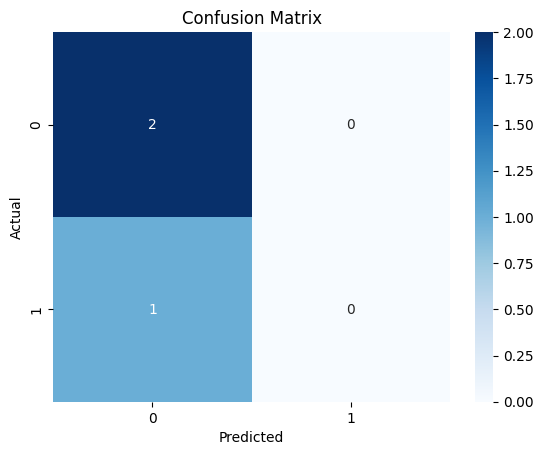

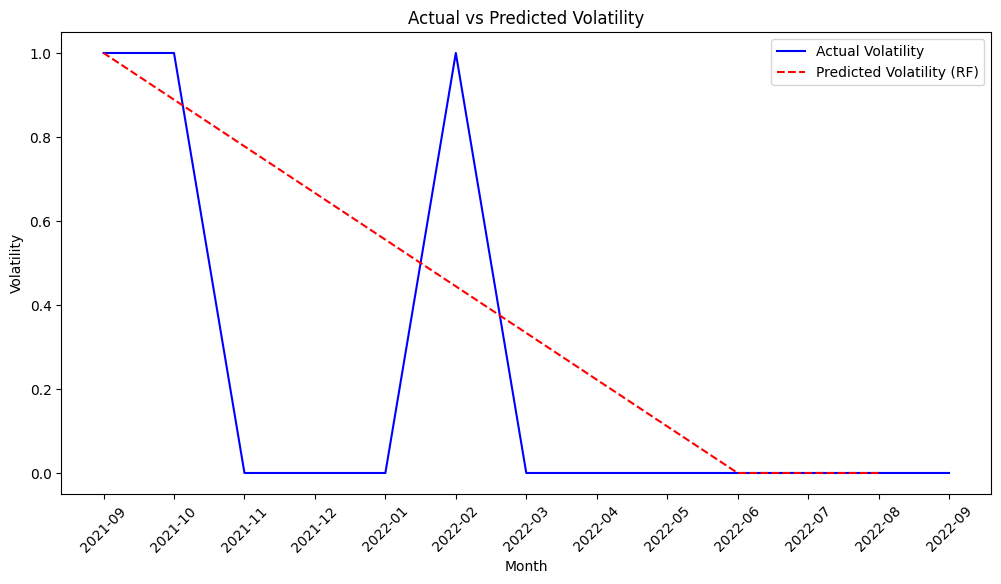

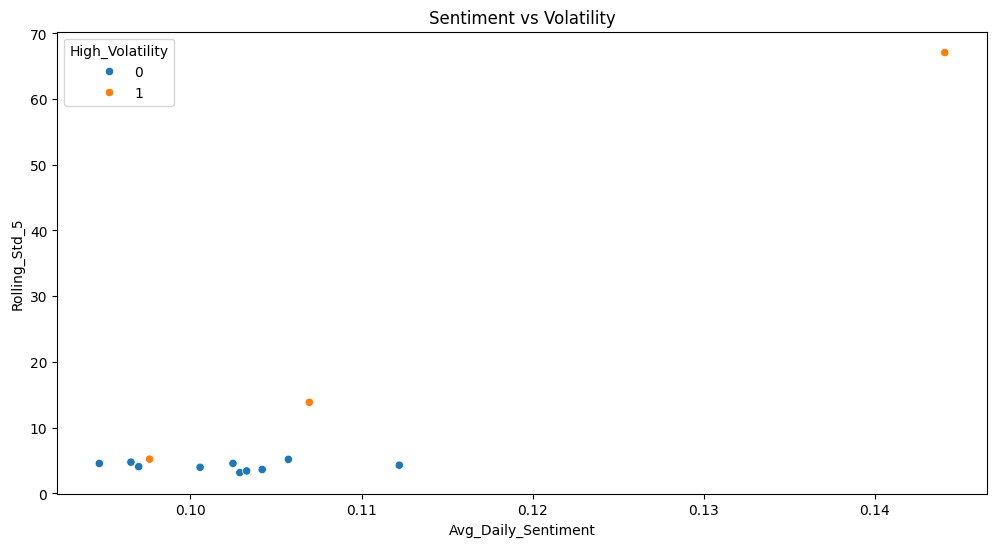

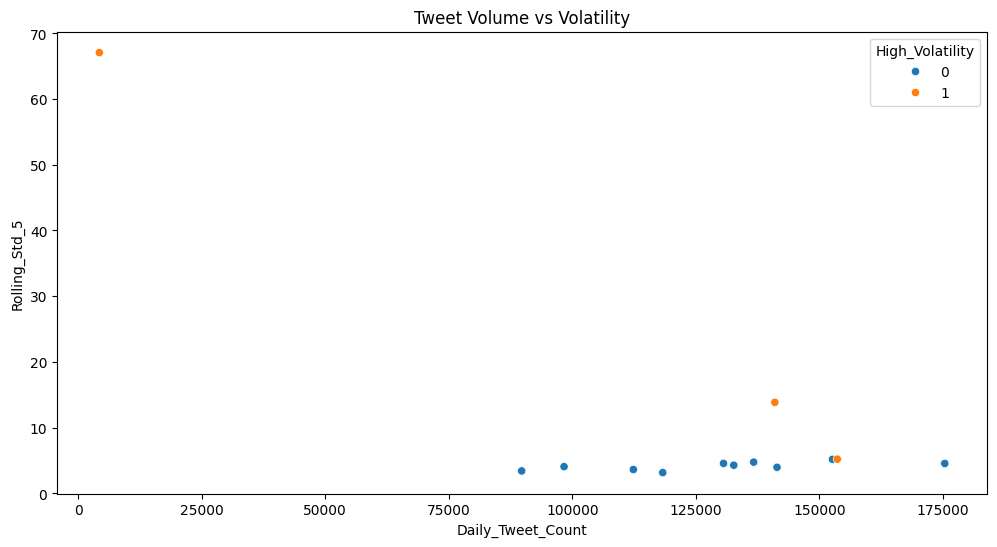

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/merged_stock_tweet_data (1).csv')

# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Extract month and year from 'Date'
data['YearMonth'] = data['Date'].dt.to_period('M')

# Aggregate data by month
monthly_data = data.groupby('YearMonth').agg({
    'Daily_Return': 'mean',
    'Rolling_Std_5': 'mean',
    'MA_5': 'mean',
    'MA_20': 'mean',
    'Avg_Daily_Sentiment': 'mean',
    'Sentiment_Volatility': 'mean',
    'Daily_Tweet_Count': 'sum'
}).reset_index()

# Define High Volatility
vol_threshold = monthly_data['Rolling_Std_5'].quantile(0.75)
monthly_data['High_Volatility'] = (monthly_data['Rolling_Std_5'] > vol_threshold).astype(int)

# Feature Selection
features = ['Daily_Return', 'Rolling_Std_5', 'MA_5', 'MA_20',
            'Avg_Daily_Sentiment', 'Sentiment_Volatility', 'Daily_Tweet_Count']
target = 'High_Volatility'

X = monthly_data[features]
y = monthly_data[target]

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Building
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Fit models
for model_name, model in models.items():
    if model_name == 'Logistic Regression':
        model.fit(X_train_scaled, y_train)
    else:
        model.fit(X_train, y_train)

# Model Evaluation
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'ROC-AUC: {roc_auc:.4f}')

    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Evaluate all models
for model_name, model in models.items():
    print(f"{model_name} Results:")
    if model_name == 'Logistic Regression':
        evaluate_model(model, X_test_scaled, y_test)
    else:
        evaluate_model(model, X_test, y_test)

# Visualization
# Plotting predicted vs actual volatility periods
plt.figure(figsize=(12, 6))
plt.plot(monthly_data['YearMonth'].astype(str), monthly_data['High_Volatility'], label='Actual Volatility', color='blue')
plt.plot(monthly_data['YearMonth'].iloc[y_test.index].astype(str), models['Random Forest'].predict(X_test), label='Predicted Volatility (RF)', linestyle='--', color='red')
plt.xlabel('Month')
plt.ylabel('Volatility')
plt.title('Actual vs Predicted Volatility')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Relationship between tweet sentiment/volume and volatility
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Avg_Daily_Sentiment', y='Rolling_Std_5', hue='High_Volatility', data=monthly_data)
plt.title('Sentiment vs Volatility')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Daily_Tweet_Count', y='Rolling_Std_5', hue='High_Volatility', data=monthly_data)
plt.title('Tweet Volume vs Volatility')
plt.show()
